# Customer Churn analysis

## Version: 2.0

In this notebook, I am using __[telecom customer churn dataset](https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/)__  to study the customer behaviour, predict the likelihood for customers to churn. This dataset has 7043 samples with 21 features that includes demographic information such as gender, if they have partners, dependents, the services they have signed up for (phone, internet, streamingTV etc), whether they use paperless billing, their contract types, monthly charges, total charges and which of the customers had already churned within the last month. The 'Churn' column is the variable we will be using to predict.  

This notebook will be classified as:

- Initiate libraries, Downloading and Cleaning Data
- Initial Structure and Description of Data
- Visualizations and Graphical Analysis
- Predictive Analysis
- Conclusion

We will ask the following questions while going through this notebook such as: 

- Which features may influence the customer to leave?
- What are the important features to look for?
- Which customers have high likelihood of leaving?


## Initiate libraries, Download and Cleaning Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

After initiating the necessary libraries, we download the data and look at the data by transposing the data for easier visualizations. We also create Na values should there be any empty variables in any of the features. We will also change the SeniorCitizen into a categorical data type for easier 

In [2]:
#read the csv file
telco_df = pd.read_csv("data/WA_Fn-UseC_-Telco-Customer-Churn.csv",na_values=[" "])
telco_df.shape

In [4]:
#We will transpose data for easier visualizations
telco_df.head().T 

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [5]:
#changing the column SeniorCitizen to a categorical column
telco_df['SeniorCitizen']=pd.Categorical(telco_df['SeniorCitizen']) 
telco_df.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

In [7]:
#We want to delete the customerId, as we want our analysis to be more generalised
del telco_df['customerID']

In [112]:
#check for nulls and replace nulls with 0
telco_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [111]:
telco_df = telco_df.fillna(value=0)

## Initial Structure and Describtion of Data

Let us explore a little about the structure of the analysis, and how unique the variables are between each column

In [110]:
# we explore the unique items in the columns
for item in telco_df.columns:
    print(item)
    print (telco_df[item].unique())

gender
['Female' 'Male']
SeniorCitizen
[0, 1]
Categories (2, int64): [0, 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges
[29.85 56.95 53.85 ... 63.1  44.2  78.

In [113]:
# Since we have objects and numericals, we will divide the dataset by the data types available
isnumeric = ['float64', 'int64']
numeric_df = telco_df.select_dtypes(include=isnumeric)
objects_df = telco_df.select_dtypes(exclude=isnumeric)

In [114]:
numeric_df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [115]:
objects_df.describe().T

,count,unique,top,freq
gender,7043,2,Male,3555
SeniorCitizen,7043,2,0,5901
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [116]:
# Let us count the Churn and not churned
telco_df.groupby('Churn').size()

Churn
No     5174
Yes    1869
dtype: int64

We have seen the structure of the dataset telco_df, understood the number of unique items for object and categorical datatypes, and now we want to look at some graphical distribution of the variables to understand the proportion of categorical variables and how these variables relate to each other.

## Visualizations and graphical analysis

Let is start by looking at the numerical data types and how the distribution looks like graphically

[]

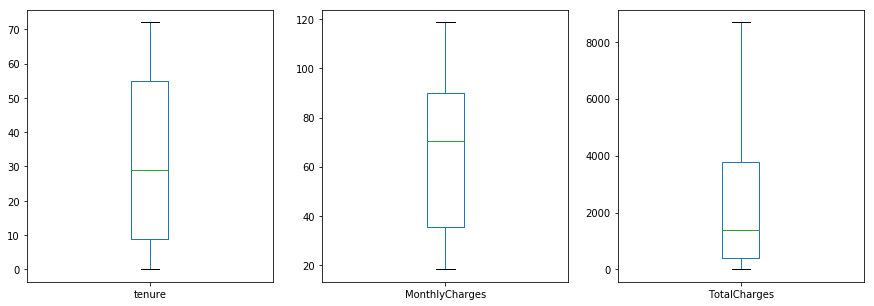

In [107]:
# box plots
numeric_df.plot(kind='box', subplots=True,figsize=(15,5))
plt.plot()

[]

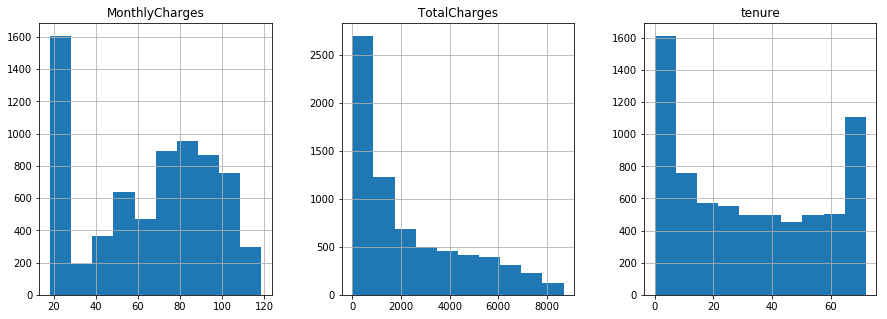

In [108]:
# histogram plots
numeric_df.hist(layout=(1,3), figsize=(15,5))
plt.plot()

We can quickly see that our numerical variables are not normally distributed, and we would want to check how these variables would relate to the predict variable "Churn".

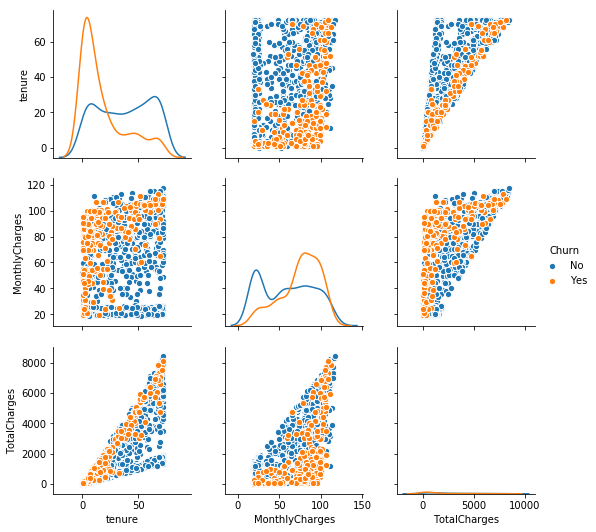

In [117]:
numeric_df = pd.concat([numeric_df,telco_df["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_df.sample(n=1000),hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

We can quickly see that both tenure and Monthly charges look like good variables to use for the 'Churn' variables, so we will explore these variables using a violin graph to understand the where to create these bins according to low churn, medium churn, high churn.

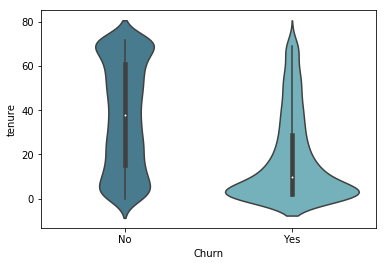

In [103]:
sns.violinplot(x="Churn", y="tenure", data=numeric_df, palette='GnBu_d');

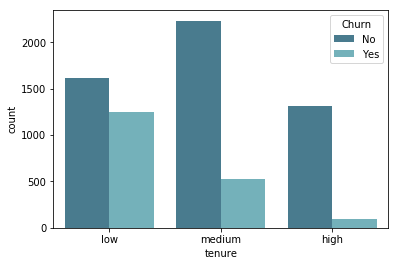

In [100]:
# we will try three bins
tenure_bins=pd.cut(numeric_df["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_df, palette="GnBu_d");

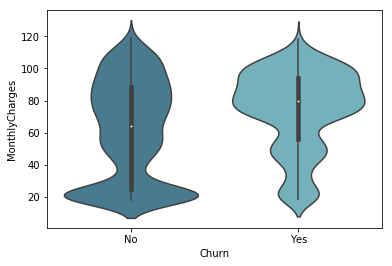

In [102]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_df, palette='GnBu_d');

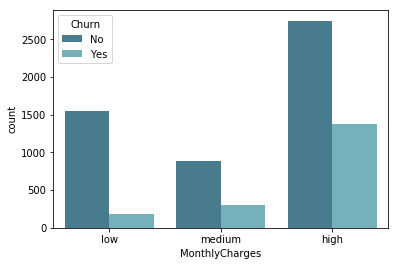

In [99]:
MonthlyCharges_bins=pd.cut(numeric_df["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_df, palette="GnBu_d");

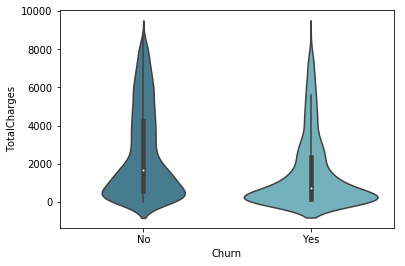

In [101]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_df, palette='GnBu_d');

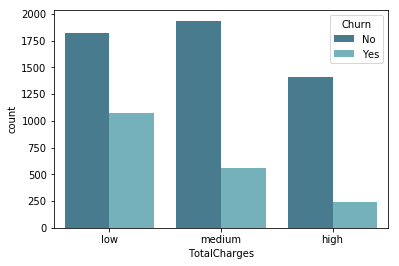

In [98]:
TotalCharges_bins=pd.cut(numeric_df["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_df, palette="GnBu_d");


In [45]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

We will now look at the categorical/object variables, and since they are so many, we will visualise all the features available in one facet plot

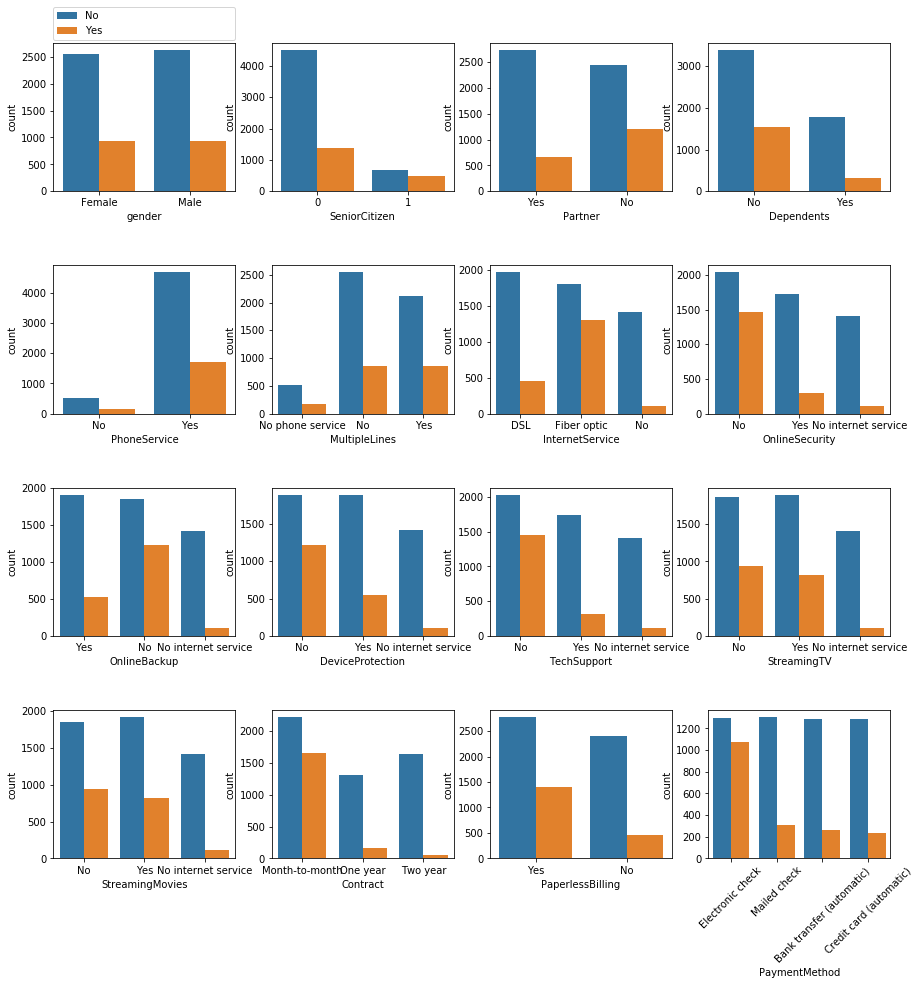

In [46]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_df.iloc[:,i], hue=objects_df["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

We can see which variables are more important to us such as Month-to-month contract is a strong indicator if the client might leave soon, so is the Electronic check payment method, so we will focus on the variables that delivers best results first according to our hypothesis.

## Predictive Analysis

We will now create models using the 'Churn' variable by concating the numerical bins with the categorical bins into one big data frame and transform the categorical variables into binary vectors.

In [48]:
data=pd.concat([bins,objects_df],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummies = pd.get_dummies(data) # Transform the categorical variables into binary vectors

Now as we have the concatenated the dataframe, we will now split the dataset into a training and testing dataset

In [49]:
features = dummies.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummies[features].values
Y = dummies["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

We will start with the training model, I will use kfold to compare different models and will use the best model for my churn prediction model

In [52]:
scoring = 'accuracy'
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNN Classifier', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

C:\Users\Dalina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dalina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dalina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dalina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Dalina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Logistic Regression: 0.796245 (0.014536)
KNN Classifier: 0.748137 (0.010110)
CART: 0.724174 (0.012437)
Gaussian NB: 0.700752 (0.014216)


When looking at the results, It looks like the Logistic Regression is the best model to use for our prediction, let us look at this in a graphical format:

[]

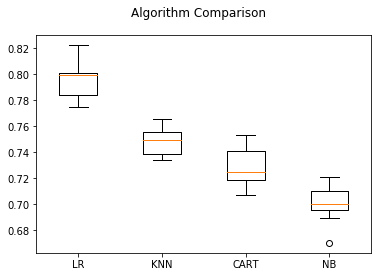

In [51]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

In [53]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8126330731014905
[[936  85]
 [179 209]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1021
           1       0.71      0.54      0.61       388

   micro avg       0.81      0.81      0.81      1409
   macro avg       0.78      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



C:\Users\Dalina\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The above table demonstrates that the model has a good overall prediction, but it may be too conservative. We want to predict the likelihood of customers leaving, not predict exactly the number of customers that will leave.

Let us look at the coefficients for this model to see which features are important.

In [54]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
43,0.371261,Contract_Month-to-month
23,0.290835,InternetService_Fiber optic
1,0.288874,tenure_low
7,0.151319,TotalCharges_low
25,0.102319,OnlineSecurity_No


,importance,labels
46,-0.134875,PaperlessBilling_No
3,-0.193785,MonthlyCharges_high
0,-0.209349,tenure_high
22,-0.300188,InternetService_DSL
45,-0.400681,Contract_Two year


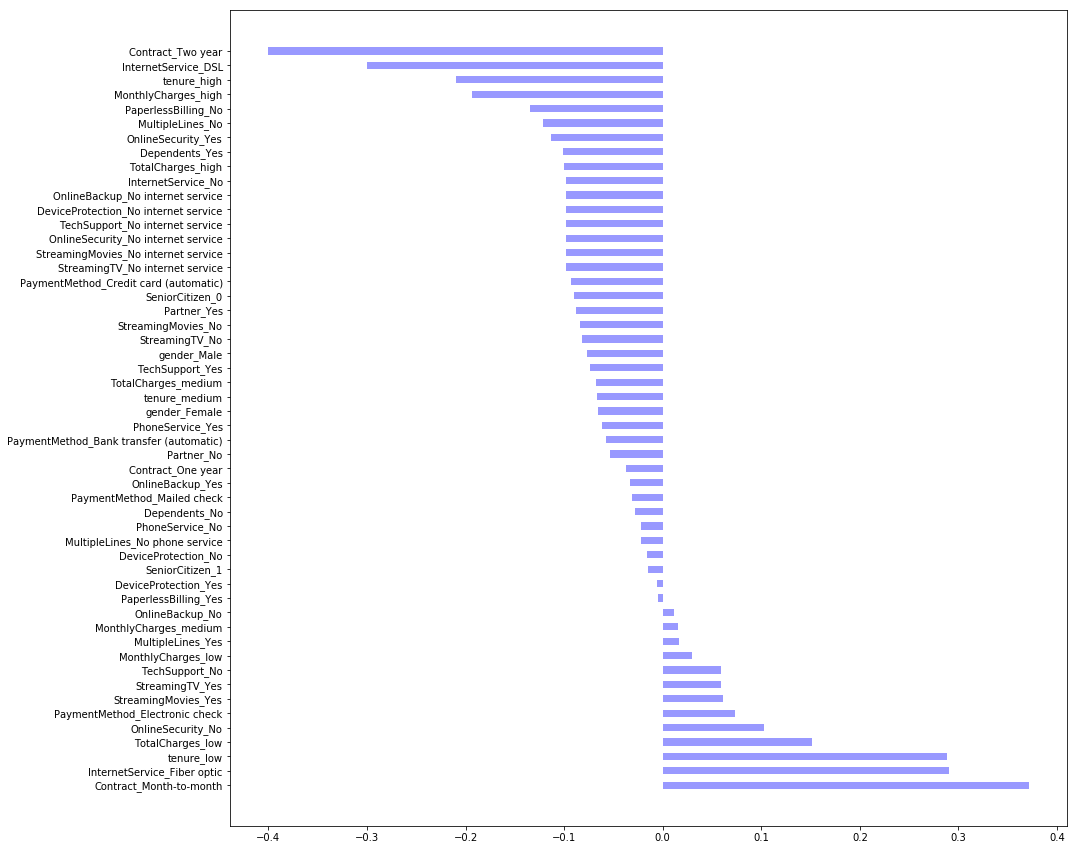

In [55]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()

From the table and graph above, we can see that more importance lie on the contract type "Contract_Month-to-month" followed by internetService_Fiber optic. Let us make a probability model using KFold and predict the probability of churn in 0.1 increments.

In [155]:
from sklearn.model_selection import KFold,cross_val_score
import warnings
warnings.filterwarnings('ignore')

def run_prob_cv(X, y, clf_class, **kwargs):
   kf = KFold(n_splits=5,shuffle=True)
   y_prob = np.zeros((len(y),2))
   for train_index, test_index in kf.split(X):
      X_train, X_test = X[train_index], X[test_index]
      y_train = y[train_index]
      clf = clf_class(**kwargs)
      clf.fit(X_train,y_train)
      y_prob[test_index] = clf.predict_proba(X_test)
   return y_prob

In [156]:
pred_prob = run_prob_cv(X, Y, LogisticRegression)
pred_churn = pred_prob[:,1]
is_churn = Y == 1

# Number of times a predicted probability is assigned to an observation
counts = pd.value_counts(pred_churn)

# calculate true probabilities
true_prob = {}
for prob in counts.index:
 true_prob[prob] = np.mean(is_churn[pred_churn == prob])
 true_prob = pd.Series(true_prob)

# pandas-fu
counts = pd.concat([counts,true_prob], axis=1).reset_index()
counts.columns = ['pred_prob', 'count', 'true_prob']
counts["probability"] = pd.cut(counts["pred_prob"], bins=np.arange(0,1.1,0.1), labels=["%.2f"%number for number in np.arange(0,1,0.1)])
counts.groupby("probability").agg({'count':['sum'],'pred_prob':['mean'],'true_prob': ['mean']})

,count,pred_prob,true_prob
,sum,mean,mean
probability,,,
0.00,2640,0.038146,0.041507
0.10,1030,0.149169,0.143264
0.20,643,0.248304,0.263260
0.30,653,0.348947,0.322473
0.40,599,0.446357,0.418532
0.50,509,0.549605,0.553672
0.60,500,0.649819,0.650317
0.70,385,0.749769,0.722092


We have constructed a table  with the averages of predicted probability and true probability and counted the customers and grouped according to its probability of churn. Let us filter for customers who have +80% likelihood to churn, and let us see the frequency and features of these customers.

In [163]:
result = pd.DataFrame(X[pred_prob[:,1]>0.8], columns=features)

In [164]:
def undummy(df):
   x=result.stack()
   stacked=pd.DataFrame(x[x!=0].index.get_level_values(1))
   newdata=stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == 0]]
   for col in np.arange(1,19):
      newdata=pd.concat([newdata.reset_index(drop=True),stacked.loc[[i for j, i in enumerate(stacked.index) if j % 19 == col]].reset_index(drop=True)],axis=1)
   newdata.columns = [x.partition('_')[0] for x in newdata.loc[0].values]
   newdata = pd.DataFrame([newdata[x].str.replace('(.*)_','') for x in newdata.columns]).T
   return newdata

In [165]:
final = undummy(result)
final.describe().T

,count,unique,top,freq
tenure,84,1,low,84
MonthlyCharges,84,1,high,84
TotalCharges,84,1,low,84
gender,84,2,Male,43
SeniorCitizen,84,2,1,57
Partner,84,2,No,64
Dependents,84,2,No,82
PhoneService,84,1,Yes,84
MultipleLines,84,2,Yes,70
InternetService,84,1,Fiber optic,84


The table above gives you  the number of customers with +80% likelihood to churn, and , which from our model was predicted to be 84 customers. Looking at the last column, we can see the top features and the frequency according to the different fields available. 